In [1]:
# imports for database connection
import math
import pandas as pd
import sqlalchemy
import statistics 
from statistics import mean
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, func

# import these to view table column headers & rows
from sqlalchemy.orm import sessionmaker
from sqlalchemy import select

# Import the dependencies for analysis
%matplotlib inline

import json
import numpy as np
from scipy import stats
from scipy.stats import linregress
import pandas as pd
import datetime as dt
from datetime import date
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///Resources/covid_db.db")

In [3]:
# reflect an existing database into a new model (creates base class for automap schema)
Base = automap_base()

In [4]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
Base.classes.keys()

['covid_stats', 'government_regulation']

In [6]:
# save references to each table
covid_stats = Base.classes.covid_stats
government_regulation = Base.classes.government_regulation

In [7]:
# Create session (link) from Python to the database
session = sessionmaker(bind=engine)()

In [8]:
# Merge covid_stats_table with government regulation_table
joined = session.query(covid_stats.primary_key_reaction,\
                        covid_stats.date_updated,\
                        covid_stats.iso_code,\
                        covid_stats.continent,\
                        covid_stats.location,\
                        covid_stats.population,\
                        covid_stats.population_density,\
                        covid_stats.median_age,\
                        covid_stats.new_cases,\
                        covid_stats.percentage_of_Pop_New_Cases,\
                        covid_stats.new_deaths,\
                        covid_stats.percentage_of_Pop_New_Deaths,\
                        covid_stats.new_tests,\
                        covid_stats.percentage_of_Pop_New_Tests,\
                        covid_stats.total_cases_updated,\
                        covid_stats.percentage_of_Pop_Total_Cases,\
                        covid_stats.total_deaths_updated,\
                        covid_stats.percentage_of_Pop_Total_Deaths,\
                        covid_stats.total_tests_updated,\
                        covid_stats.percentage_of_Pop_Total_Tests,\
                       government_regulation.primary_key_response,\
                       government_regulation.StringencyIndex_updated,\
                       government_regulation.percentage_change_stringency,\
                       government_regulation.StringencyLegacyIndex_updated,\
                       government_regulation.GovernmentResponseIndex_updated,\
                       government_regulation.percentage_change_GovernmentResponse,\
                       government_regulation.ContainmentHealthIndex_updated,\
                       government_regulation.percentage_change_ContainmentHealth,\
                       government_regulation.EconomicSupportIndex_updated,\
                       government_regulation.percentage_change_EconomicSupport)\
        .join(government_regulation,government_regulation.primary_key_response == covid_stats.primary_key_reaction)

# save the query results as a Pandas DataFrame and set the index
merged_covid_df = pd.DataFrame(joined, columns=['primary_key_reaction',
                                             'date_updated',
                                             'iso_code',
                                             'continent',
                                             'location',
                                             'population',
                                             'population_density',
                                             'median_age',
                                             'new_cases',
                                             'percentage_of_Pop_New_Cases',
                                             'new_deaths',
                                             'percentage_of_Pop_New_Deaths',
                                             'new_tests',
                                             'percentage_of_Pop_New_Tests',
                                             'total_cases_updated',
                                             'percentage_of_Pop_Total_Cases',
                                             'total_deaths_updated',
                                             'percentage_of_Pop_Total_Deaths',
                                             'total_tests_updated',
                                             'percentage_of_Pop_Total_Tests',
                                             'primary_key_response',
                                             'StringencyIndex_updated',
                                             'percentage_change_stringency',
                                             'StringencyLegacyIndex_updated',
                                             'GovernmentResponseIndex_updated',
                                             'percentage_change_GovernmentResponse',
                                             'ContainmentHealthIndex_updated',
                                             'percentage_change_ContainmentHealth',
                                             'EconomicSupportIndex_updated',
                                             'percentage_change_EconomicSupport'
                                             ])

In [9]:
# preview 
merged_covid_df

,primary_key_reaction,date_updated,iso_code,continent,location,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,...,primary_key_response,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
0,ABW2020-03-13,2020-03-13,ABW,North America,Aruba,106766,584.800,41.2,2,0.001873,...,ABW2020-03-13,0.00,0.000000,0.00,2.56,0.000000,3.03,0.000000,0.0,0.0
1,ABW2020-03-19,2020-03-19,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,...,ABW2020-03-19,33.33,0.000000,42.86,29.49,15.015601,34.85,15.016502,0.0,0.0
2,ABW2020-03-20,2020-03-20,ABW,North America,Aruba,106766,584.800,41.2,2,0.001873,...,ABW2020-03-20,33.33,0.000000,42.86,29.49,0.000000,34.85,0.000000,0.0,0.0
3,ABW2020-03-21,2020-03-21,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,...,ABW2020-03-21,44.44,33.333333,60.71,37.18,26.076636,43.94,26.083214,0.0,0.0
4,ABW2020-03-22,2020-03-22,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,...,ABW2020-03-22,44.44,0.000000,60.71,37.18,0.000000,43.94,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32272,ZWE2020-08-27,2020-08-27,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,55,0.000370,...,ZWE2020-08-27,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32273,ZWE2020-08-28,2020-08-28,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,41,0.000276,...,ZWE2020-08-28,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32274,ZWE2020-08-29,2020-08-29,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,96,0.000646,...,ZWE2020-08-29,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32275,ZWE2020-08-30,2020-08-30,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,18,0.000121,...,ZWE2020-08-30,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0


# Record the "ramp up" of the stringency index for each country

In [10]:
countries = list(merged_covid_df['location'].unique())
print(countries)
len(countries)

['Aruba', 'Afghanistan', 'Angola', 'Albania', 'United Arab Emirates', 'Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Democratic Republic of Congo', 'Congo', 'Colombia', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia', 'Greece', 'Guatemala', 'Guam', 'Guyana', 'Hong Kong', 'Honduras', 'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'India', 'Ireland', 'Iran', 'Iraq', 'Iceland', 'Israel', 'Italy', 'Jamaica', 'Jordan', 'Japan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan

164

In [11]:
# Determine the average of total minimum values per country within the Stringency Index
min_list = []

for country in countries:
    countryLoc = merged_covid_df.loc[merged_covid_df['location'] == country]
    stringencyResp = countryLoc['StringencyIndex_updated']
    stringencyResp_min = stringencyResp.min(axis=0)
    min_list.append(stringencyResp_min)
    
print(min_list)

mean = mean(min_list)
mean

[0.0, 0.0, 11.11, 36.11, 0.0, 11.11, 0.0, 0.0, 0.0, 11.11, 0.0, 27.78, 0.0, 13.89, 21.3, 0.0, 11.11, 0.0, 54.63, 30.56, 0.0, 38.89, 19.44, 31.48, 47.22, 11.11, 0.0, 0.0, 0.0, 0.0, 11.11, 0.0, 11.11, 11.11, 12.04, 43.52, 11.11, 13.89, 22.22, 0.0, 0.0, 33.33, 0.0, 0.0, 0.0, 0.0, 0.0, 22.22, 0.0, 0.0, 2.78, 0.0, 11.11, 0.0, 33.33, 0.0, 0.0, 8.33, 13.89, 31.94, 0.0, 41.67, 49.07, 25.0, 41.67, 11.11, 0.0, 17.59, 11.11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.56, 0.0, 0.0, 19.44, 13.89, 63.89, 0.0, 0.0, 0.0, 11.11, 0.0, 30.56, 87.96, 0.0, 54.63, 0.0, 0.0, 8.33, 0.0, 11.11, 59.26, 0.0, 47.22, 43.52, 49.07, 44.44, 16.67, 16.67, 50.0, 0.0, 8.33, 13.89, 0.0, 8.33, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.33, 0.0, 0.0, 22.22, 11.11, 60.19, 11.11, 5.56, 74.07, 0.0, 0.0, 0.0, 30.09, 11.11, 45.37, 0.0, 0.0, 32.41, 65.74, 8.33, 13.89, 33.33, 16.67, 11.11, 0.0, 19.44, 25.0, 27.78, 0.0, 0.0, 46.3, 13.89, 20.37, 0.0, 23.15, 22.22, 47.22, 11.11, 20.37, 0.0, 60.19, 51.85, 0.0, 31.48, 2.78, 16.67, 27.78]


15.147743902439025

In [12]:
# List of filtered countries for "ramp up" period
ramp_up = []

In [13]:
# Loop through all countries and capture ramp up period
for location in countries:
    country = merged_covid_df.loc[merged_covid_df['location'] == location]
   
    country = country.loc[(country.StringencyIndex_updated >= 15) &
                   (country.percentage_change_stringency > 0) &
                   (country.StringencyIndex_updated <= country["StringencyIndex_updated"].max())
                  ]
    
    country['date_updated'] = pd.to_datetime(country['date_updated'])
    country.reset_index(inplace=True)
    
    ramp_up_max = country.StringencyIndex_updated.max()
    ramp_up_end_date = country.loc[country.StringencyIndex_updated == ramp_up_max]
    ramp_up_end_date = ramp_up_end_date.drop_duplicates(subset=['StringencyIndex_updated'], keep='first')
    ramp_up_date = ramp_up_end_date['date_updated']
    index = ramp_up_date.index.values
    index = index.tolist()
    
    country.drop(country.index[np.where(country.index > index)[0]],inplace=True)
    
    ramp_up.append(country)
    
ramp_up_df = pd.DataFrame()

for df in ramp_up:
    ramp_up_df = ramp_up_df.append(df)

In [14]:
ramp_up_df.reset_index(inplace=True)
ramp_up_df.drop(['index'],axis=1,inplace=True)
ramp_up_df.drop(['level_0'],axis=1,inplace=True)

In [15]:
ramp_up_df

,primary_key_reaction,date_updated,iso_code,continent,location,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,...,primary_key_response,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
0,ABW2020-03-21,2020-03-21,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,...,ABW2020-03-21,44.44,33.333333,60.71,37.18,26.076636,43.94,26.083214,0.0,0.0
1,ABW2020-03-29,2020-03-29,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,...,ABW2020-03-29,85.19,91.696670,85.71,65.38,75.847230,77.27,75.853437,0.0,0.0
2,ABW2020-04-10,2020-04-10,ABW,North America,Aruba,106766,584.800,41.2,5,0.004683,...,ABW2020-04-10,88.89,4.343233,85.71,81.41,3.246671,80.30,3.921315,87.5,0.0
3,AFG2020-03-01,2020-03-01,AFG,Asia,Afghanistan,38928341,54.422,18.6,0,0.000000,...,AFG2020-03-01,27.78,233.493397,34.52,25.64,110.509031,30.30,110.562891,0.0,0.0
4,AFG2020-03-14,2020-03-14,AFG,Asia,Afghanistan,38928341,54.422,18.6,0,0.000000,...,AFG2020-03-14,38.89,39.992801,48.81,33.33,29.992200,39.39,30.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,ZMB2020-05-02,2020-05-02,ZMB,Africa,Zambia,18383956,22.995,17.7,3,0.000016,...,ZMB2020-05-02,70.83,8.501838,70.95,63.14,6.493506,70.08,6.943385,25.0,0.0
948,ZWE2020-03-23,2020-03-23,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,0,0.000000,...,ZWE2020-03-23,45.37,63.318934,47.62,31.41,63.338534,37.12,63.308403,0.0,0.0
949,ZWE2020-03-24,2020-03-24,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,0,0.000000,...,ZWE2020-03-24,56.48,24.487547,61.90,42.95,36.739892,50.76,36.745690,0.0,0.0
950,ZWE2020-03-27,2020-03-27,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,0,0.000000,...,ZWE2020-03-27,62.04,9.844193,66.67,46.79,8.940629,55.30,8.944050,0.0,0.0


In [16]:
ramp_up_df.columns

Index(['primary_key_reaction', 'date_updated', 'iso_code', 'continent',
       'location', 'population', 'population_density', 'median_age',
       'new_cases', 'percentage_of_Pop_New_Cases', 'new_deaths',
       'percentage_of_Pop_New_Deaths', 'new_tests',
       'percentage_of_Pop_New_Tests', 'total_cases_updated',
       'percentage_of_Pop_Total_Cases', 'total_deaths_updated',
       'percentage_of_Pop_Total_Deaths', 'total_tests_updated',
       'percentage_of_Pop_Total_Tests', 'primary_key_response',
       'StringencyIndex_updated', 'percentage_change_stringency',
       'StringencyLegacyIndex_updated', 'GovernmentResponseIndex_updated',
       'percentage_change_GovernmentResponse',
       'ContainmentHealthIndex_updated', 'percentage_change_ContainmentHealth',
       'EconomicSupportIndex_updated', 'percentage_change_EconomicSupport'],
      dtype='object')

In [17]:
name = []
start = []
end = []
length = []
minimum = []
maximum = []
population = []
total_tests_beg = []
percent_pop_tests_beg = []
total_cases_beg = []
percent_pop_cases_beg = []
total_deaths_beg = []
percent_pop_deaths_beg = []

In [18]:
for location in countries:
    country = ramp_up_df.loc[ramp_up_df['location'] == location]
   
    country_name = location
    minimum_stringency = country['StringencyIndex_updated'].min()
    maximum_stringency = country['StringencyIndex_updated'].max()
    ramp_start = country['date_updated'].min()
    ramp_end = country['date_updated'].max()
    ramp_length = ramp_end - ramp_start
    total_population = country['population'].min()
    
    t_tests_beg = country['total_tests_updated'].min()
    pp_tests_beg = country['percentage_of_Pop_Total_Tests'].min()
    
    t_cases_beg = country['total_cases_updated'].min()
    pp_cases_beg = country['percentage_of_Pop_Total_Cases'].min()
    
    t_deaths_beg = country['total_deaths_updated'].min()
    pp_deaths_beg = country['percentage_of_Pop_Total_Deaths'].min()
    
    name.append(country_name)
    minimum.append(minimum_stringency)
    maximum.append(maximum_stringency)
    start.append(ramp_start)
    end.append(ramp_end)
    length.append(ramp_length)
    population.append(total_population)
    total_tests_beg.append(t_tests_beg)
    percent_pop_tests_beg.append(pp_tests_beg)
    total_cases_beg.append(t_cases_beg)
    percent_pop_cases_beg.append(pp_cases_beg)
    total_deaths_beg.append(t_deaths_beg)
    percent_pop_deaths_beg.append(pp_deaths_beg)
    
ramp_up_details = pd.DataFrame({
    "country" : name,
    "min_stringency": minimum,
    "max_stringency": maximum,
    "ramp_start" : start,
    "ramp_end" : end,
    "ramp_length" : length,
    "population" : population,
    "total_tests_beg" : total_tests_beg,
    "percent_pop_tests_beg" : percent_pop_tests_beg,
    "total_cases_beg" : total_cases_beg,
    "percent_pop_cases_beg" : percent_pop_cases_beg,
    "total_deaths_beg" : total_deaths_beg,
    "percent_pop_deaths_beg" : percent_pop_deaths_beg
})

In [19]:
ramp_up_details.sort_values(by=['country'],inplace=True)
ramp_up_details.set_index(ramp_up_details['country'],inplace=True)
ramp_up_details.drop(['country'],axis=1,inplace=True)

In [20]:
ramp_up_details

,min_stringency,max_stringency,ramp_start,ramp_end,ramp_length,population,total_tests_beg,percent_pop_tests_beg,total_cases_beg,percent_pop_cases_beg,total_deaths_beg,percent_pop_deaths_beg
country,,,,,,,,,,,,
Afghanistan,27.78,84.26,2020-03-01,2020-04-12,42 days,38928341.0,0.0,0.00000,1.0,0.000003,0.0,0.000000
Albania,36.11,89.81,2020-03-09,2020-04-18,40 days,2877800.0,0.0,0.00000,2.0,0.000069,0.0,0.000000
Algeria,16.67,92.13,2020-03-10,2020-04-14,35 days,43851043.0,0.0,0.00000,20.0,0.000046,0.0,0.000000
Angola,33.33,90.74,2020-03-24,2020-03-27,3 days,32866268.0,0.0,0.00000,2.0,0.000006,0.0,0.000000
Argentina,25.00,100.00,2020-03-11,2020-03-23,12 days,45195777.0,158.0,0.00035,19.0,0.000042,1.0,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,72.22,87.04,2020-03-16,2020-06-22,98 days,28435943.0,0.0,0.00000,15.0,0.000053,0.0,0.000000
Vietnam,23.15,96.30,2020-01-29,2020-04-01,63 days,97338583.0,0.0,0.00000,2.0,0.000002,0.0,0.000000
Yemen,40.74,58.33,2020-04-10,2020-05-01,21 days,29825968.0,0.0,0.00000,1.0,0.000003,0.0,0.000000


In [21]:
name = []
thirty = []
sixty = []
ninety = []
one_twenty = []
total_tests_end = []
percent_pop_tests_end = []
total_cases_end = []
percent_pop_cases_end = []
total_deaths_end = []
percent_pop_deaths_end = []
total_tests_30 = []
percent_pop_tests_30 = []
total_cases_30 = []
percent_pop_cases_30 = []
total_deaths_30 = []
percent_pop_deaths_30 = []
total_tests_60 = []
percent_pop_tests_60 = []
total_cases_60 = []
percent_pop_cases_60 = []
total_deaths_60 = []
percent_pop_deaths_60 = []
total_tests_90 = []
percent_pop_tests_90 = []
total_cases_90 = []
percent_pop_cases_90 = []
total_deaths_90 = []
percent_pop_deaths_90 = []
total_tests_120 = []
percent_pop_tests_120 = []
total_cases_120 = []
percent_pop_cases_120 = []
total_deaths_120 = []
percent_pop_deaths_120 = []

end = dt.datetime(2020,8,31)

In [22]:
for location in countries:
    
    country = ramp_up_details.loc[ramp_up_details.index == location].copy()

    # To track # days out (and if extends past Aug 31, use Aug 31 as last date)
    country_end = country['ramp_start'][0]
    
    if country['ramp_start'][0]+timedelta(days=30) > end:
        country_30 = end
    else:
        country_30 = country['ramp_start'][0]+timedelta(days=30)
        
    if country['ramp_start'][0]+timedelta(days=60) > end:
        country_60 = end
    else:
        country_60 = country['ramp_start'][0]+timedelta(days=60)
        
    if country['ramp_start'][0]+timedelta(days=90) > end:
        country_90 = end
    else:
        country_90 = country['ramp_start'][0]+timedelta(days=90)
        
    if country['ramp_start'][0]+timedelta(days=120) > end:
        country_120 = end
    else:
        country_120 = country['ramp_start'][0]+timedelta(days=120)    
   
    country_name = location
    
    name.append(location)
    thirty.append(country_30)
    sixty.append(country_60)
    ninety.append(country_90)
    one_twenty.append(country_120)
    
    # To track key stats at n days out
    country = merged_covid_df.loc[merged_covid_df['location'] == location].copy()
    country["date_updated"] = pd.to_datetime(country["date_updated"])
    
    sub_total_updated_end = country.loc[country.date_updated == country_end]
    sub_total_updated_30 = country.loc[country.date_updated == country_30]
    sub_total_updated_60 = country.loc[country.date_updated == country_60]
    sub_total_updated_90 = country.loc[country.date_updated == country_90]
    sub_total_updated_120 = country.loc[country.date_updated == country_120]
    
    tests_end = sub_total_updated_end.total_tests_updated.min()
    cases_end = sub_total_updated_end.total_cases_updated.min()
    deaths_end = sub_total_updated_end.total_deaths_updated.min()
    
    tests_30 = sub_total_updated_30.total_tests_updated.min()
    if tests_30 is None:
        print(country_name)
    cases_30 = sub_total_updated_30.total_cases_updated.min()
    deaths_30 = sub_total_updated_30.total_deaths_updated.min()

    tests_60 = sub_total_updated_60.total_tests_updated.min()
    cases_60 = sub_total_updated_60.total_cases_updated.min()
    deaths_60 = sub_total_updated_60.total_deaths_updated.min()

    tests_90 = sub_total_updated_90.total_tests_updated.min()
    cases_90 = sub_total_updated_90.total_cases_updated.min()
    deaths_90 = sub_total_updated_90.total_deaths_updated.min()

    tests_120 = sub_total_updated_120.total_tests_updated.min()
    cases_120 = sub_total_updated_120.total_cases_updated.min()
    deaths_120 = sub_total_updated_120.total_deaths_updated.min()

    pop_tests_end = sub_total_updated_end.percentage_of_Pop_Total_Tests.min()
    pop_cases_end = sub_total_updated_end.percentage_of_Pop_Total_Cases.min()
    pop_deaths_end = sub_total_updated_end.percentage_of_Pop_Total_Deaths.min()
    
    pop_tests_30 = sub_total_updated_30.percentage_of_Pop_Total_Tests.min()
    pop_cases_30 = sub_total_updated_30.percentage_of_Pop_Total_Cases.min()
    pop_deaths_30 = sub_total_updated_30.percentage_of_Pop_Total_Deaths.min()
    
    pop_tests_60 = sub_total_updated_60.percentage_of_Pop_Total_Tests.min()
    pop_cases_60 = sub_total_updated_60.percentage_of_Pop_Total_Cases.min()
    pop_deaths_60 = sub_total_updated_60.percentage_of_Pop_Total_Deaths.min()
    
    pop_tests_90 = sub_total_updated_90.percentage_of_Pop_Total_Tests.min()
    pop_cases_90 = sub_total_updated_90.percentage_of_Pop_Total_Cases.min()
    pop_deaths_90 = sub_total_updated_90.percentage_of_Pop_Total_Deaths.min()
    
    pop_tests_120 = sub_total_updated_120.percentage_of_Pop_Total_Tests.min()
    pop_cases_120 = sub_total_updated_120.percentage_of_Pop_Total_Cases.min()
    pop_deaths_120 = sub_total_updated_120.percentage_of_Pop_Total_Deaths.min()
    
    total_tests_end.append(tests_end)
    total_cases_end.append(cases_end)
    total_deaths_end.append(deaths_end)
        
    total_tests_30.append(tests_30)
    total_cases_30.append(cases_30)
    total_deaths_30.append(deaths_30)
 
    total_tests_60.append(tests_60)
    total_cases_60.append(cases_60)
    total_deaths_60.append(deaths_60)

    total_tests_90.append(tests_90)
    total_cases_90.append(cases_90)
    total_deaths_90.append(deaths_90)

    total_tests_120.append(tests_120)
    total_cases_120.append(cases_120)
    total_deaths_120.append(deaths_120)
    
    percent_pop_tests_end.append(pop_tests_end)
    percent_pop_cases_end.append(pop_cases_end)
    percent_pop_deaths_end.append(pop_deaths_end)
 
    percent_pop_tests_30.append(pop_tests_30)
    percent_pop_cases_30.append(pop_cases_30)
    percent_pop_deaths_30.append(pop_deaths_30)
    
    percent_pop_tests_60.append(pop_tests_60)
    percent_pop_cases_60.append(pop_cases_60)
    percent_pop_deaths_60.append(pop_deaths_60)
    
    percent_pop_tests_90.append(pop_tests_90)
    percent_pop_cases_90.append(pop_cases_90)
    percent_pop_deaths_90.append(pop_deaths_90)
    
    percent_pop_tests_120.append(pop_tests_120)
    percent_pop_cases_120.append(pop_cases_120)
    percent_pop_deaths_120.append(pop_deaths_120)


# Create date shifted DataFrames
ramp_up_future = pd.DataFrame({"country": name,
                               "total_tests_end" : total_tests_end,
                               "percent_pop_tests_end" : percent_pop_tests_end,
                               "total_cases_end" : total_cases_end,
                               "percent_pop_cases_end" : percent_pop_cases_end,
                               "total_deaths_end" : total_deaths_end,
                               "percent_pop_deaths_end" : percent_pop_deaths_end,
                               "thirty_days": thirty,
                               "total_tests_30" : total_tests_30,
                               "percent_pop_tests_30" : percent_pop_tests_30,
                               "total_cases_30" : total_cases_30,
                               "percent_pop_cases_30" : percent_pop_cases_30,
                               "total_deaths_30" : total_deaths_30,
                               "percent_pop_deaths_30" : percent_pop_deaths_30,
                               "sixty_days": sixty,
                               "total_tests_60" : total_tests_60,
                               "percent_pop_tests_60" : percent_pop_tests_60,
                               "total_cases_60" : total_cases_60,
                               "percent_pop_cases_60" : percent_pop_cases_60,
                               "total_deaths_60" : total_deaths_60,
                               "percent_pop_deaths_60" : percent_pop_deaths_60,
                               "ninety_days": ninety,
                               "total_tests_90" : total_tests_90,
                               "percent_pop_tests_90" : percent_pop_tests_90,
                               "total_cases_90" : total_cases_90,
                               "percent_pop_cases_90" : percent_pop_cases_90,
                               "total_deaths_90" : total_deaths_90,
                               "percent_pop_deaths_90" : percent_pop_deaths_90,
                               "one_twenty_days": one_twenty,
                               "total_tests_120" : total_tests_120,
                               "percent_pop_tests_120" : percent_pop_tests_120,
                               "total_cases_120" : total_cases_120,
                               "percent_pop_cases_120" : percent_pop_cases_120,
                               "total_deaths_120" : total_deaths_120,
                               "percent_pop_deaths_120" : percent_pop_deaths_120
                               })

In [23]:
ramp_up_future.sort_values(by=['country'],inplace=True)
ramp_up_future.set_index(ramp_up_future['country'],inplace=True)
ramp_up_future.drop(['country'],axis=1,inplace=True)

In [24]:
ramp_up_future

,total_tests_end,percent_pop_tests_end,total_cases_end,percent_pop_cases_end,total_deaths_end,percent_pop_deaths_end,thirty_days,total_tests_30,percent_pop_tests_30,total_cases_30,...,percent_pop_cases_90,total_deaths_90,percent_pop_deaths_90,one_twenty_days,total_tests_120,percent_pop_tests_120,total_cases_120,percent_pop_cases_120,total_deaths_120,percent_pop_deaths_120
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.00000,1.0,0.000003,0.0,0.000000,2020-03-31,0.0,0.000000,141.0,...,0.035088,246.0,0.000632,2020-06-29,0.0,0.000000,30967.0,0.079549,721.0,0.001852
Albania,0.0,0.00000,2.0,0.000069,0.0,0.000000,2020-04-08,0.0,0.000000,383.0,...,0.042810,34.0,0.001181,2020-07-07,0.0,0.000000,2964.0,0.102995,79.0,0.002745
Algeria,0.0,0.00000,20.0,0.000046,0.0,0.000000,2020-04-09,0.0,0.000000,1572.0,...,0.023156,707.0,0.001612,2020-07-08,0.0,0.000000,16879.0,0.038492,968.0,0.002207
Angola,0.0,0.00000,2.0,0.000006,0.0,0.000000,2020-04-23,0.0,0.000000,24.0,...,0.000536,9.0,0.000027,2020-07-22,0.0,0.000000,749.0,0.002279,29.0,0.000088
Argentina,158.0,0.00035,19.0,0.000042,1.0,0.000002,2020-04-10,17889.0,0.039581,1894.0,...,0.052233,693.0,0.001533,2020-07-09,383998.0,0.849632,83413.0,0.184559,1654.0,0.003660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.0,0.00000,15.0,0.000053,0.0,0.000000,2020-04-15,0.0,0.000000,193.0,...,0.010212,24.0,0.000084,2020-07-14,0.0,0.000000,9707.0,0.034136,93.0,0.000327
Vietnam,0.0,0.00000,2.0,0.000002,0.0,0.000000,2020-02-28,0.0,0.000000,16.0,...,0.000277,0.0,0.000000,2020-05-28,261004.0,0.268140,327.0,0.000336,0.0,0.000000
Yemen,0.0,0.00000,1.0,0.000003,0.0,0.000000,2020-05-10,0.0,0.000000,34.0,...,0.004419,351.0,0.001177,2020-08-08,0.0,0.000000,1796.0,0.006022,512.0,0.001717


In [25]:
# Add new columns for % change from shifter results

# end of ramp up...
ramp_up_future["end_Days_Percentage_Change_Tests"] = ((ramp_up_future["total_tests_end"]-ramp_up_details["total_tests_beg"])/ramp_up_details["total_tests_beg"])*100
ramp_up_future["end_Days_Percentage_Change_Cases"] = ((ramp_up_future["total_cases_end"]-ramp_up_details["total_cases_beg"])/ramp_up_details["total_cases_beg"])*100
ramp_up_future["end_Days_Percentage_Change_Deaths"] = ((ramp_up_future["total_deaths_end"]-ramp_up_details["total_deaths_beg"])/ramp_up_details["total_deaths_beg"])*100

# 30 Days out...
ramp_up_future["30_Days_Percentage_Change_Tests"] = ((ramp_up_future["total_tests_30"]-ramp_up_details["total_tests_beg"])/ramp_up_details["total_tests_beg"])*100
ramp_up_future["30_Days_Percentage_Change_Cases"] = ((ramp_up_future["total_cases_30"]-ramp_up_details["total_cases_beg"])/ramp_up_details["total_cases_beg"])*100
ramp_up_future["30_Days_Percentage_Change_Deaths"] = ((ramp_up_future["total_deaths_30"]-ramp_up_details["total_deaths_beg"])/ramp_up_details["total_deaths_beg"])*100

# 60 Days out...
ramp_up_future["60_Days_Percentage_Change_Tests"] = ((ramp_up_future["total_tests_60"]-ramp_up_details["total_tests_beg"])/ramp_up_details["total_tests_beg"])*100
ramp_up_future["60_Days_Percentage_Change_Cases"] = ((ramp_up_future["total_cases_60"]-ramp_up_details["total_cases_beg"])/ramp_up_details["total_cases_beg"])*100
ramp_up_future["60_Days_Percentage_Change_Deaths"] = ((ramp_up_future["total_deaths_60"]-ramp_up_details["total_deaths_beg"])/ramp_up_details["total_deaths_beg"])*100

# 90 Days out...
ramp_up_future["90_Days_Percentage_Change_Tests"] = ((ramp_up_future["total_tests_90"]-ramp_up_details["total_tests_beg"])/ramp_up_details["total_tests_beg"])*100
ramp_up_future["90_Days_Percentage_Change_Cases"] = ((ramp_up_future["total_cases_90"]-ramp_up_details["total_cases_beg"])/ramp_up_details["total_cases_beg"])*100
ramp_up_future["90_Days_Percentage_Change_Deaths"] = ((ramp_up_future["total_deaths_90"]-ramp_up_details["total_deaths_beg"])/ramp_up_details["total_deaths_beg"])*100

# 120 Days out...
ramp_up_future["120_Days_Percentage_Change_Tests"] = ((ramp_up_future["total_tests_120"]-ramp_up_details["total_tests_beg"])/ramp_up_details["total_tests_beg"])*100
ramp_up_future["120_Days_Percentage_Change_Cases"] = ((ramp_up_future["total_cases_120"]-ramp_up_details["total_cases_beg"])/ramp_up_details["total_cases_beg"])*100
ramp_up_future["120_Days_Percentage_Change_Deaths"] = ((ramp_up_future["total_deaths_120"]-ramp_up_details["total_deaths_beg"])/ramp_up_details["total_deaths_beg"])*100

# Replace NaN with 0 
ramp_up_future.fillna(0, inplace=True)

# Replace inf with 0 
ramp_up_future.replace(np.inf, 0, inplace=True)

In [26]:
# Get all column names
ramp_up_future.columns

Index(['total_tests_end', 'percent_pop_tests_end', 'total_cases_end',
       'percent_pop_cases_end', 'total_deaths_end', 'percent_pop_deaths_end',
       'thirty_days', 'total_tests_30', 'percent_pop_tests_30',
       'total_cases_30', 'percent_pop_cases_30', 'total_deaths_30',
       'percent_pop_deaths_30', 'sixty_days', 'total_tests_60',
       'percent_pop_tests_60', 'total_cases_60', 'percent_pop_cases_60',
       'total_deaths_60', 'percent_pop_deaths_60', 'ninety_days',
       'total_tests_90', 'percent_pop_tests_90', 'total_cases_90',
       'percent_pop_cases_90', 'total_deaths_90', 'percent_pop_deaths_90',
       'one_twenty_days', 'total_tests_120', 'percent_pop_tests_120',
       'total_cases_120', 'percent_pop_cases_120', 'total_deaths_120',
       'percent_pop_deaths_120', 'end_Days_Percentage_Change_Tests',
       'end_Days_Percentage_Change_Cases', 'end_Days_Percentage_Change_Deaths',
       '30_Days_Percentage_Change_Tests', '30_Days_Percentage_Change_Cases',
       '

In [27]:
# Add new columns to ramp_up_details
new_columns = ramp_up_future[['total_tests_end', 
                              'percent_pop_tests_end',
                              'total_cases_end',
                              'percent_pop_cases_end',
                              'total_deaths_end',
                              'percent_pop_deaths_end',
                              'thirty_days',
                              'total_tests_30',
                              'percent_pop_tests_30',
                              'total_cases_30',
                              'percent_pop_cases_30',
                              'total_deaths_30',
                              'percent_pop_deaths_30',
                              'sixty_days',
                              'total_tests_60',
                              'percent_pop_tests_60',
                              'total_cases_60',
                              'percent_pop_cases_60',
                              'total_deaths_60',
                              'percent_pop_deaths_60',
                              'ninety_days',
                              'total_tests_90',
                              'percent_pop_tests_90',
                              'total_cases_90',
                              'percent_pop_cases_90',
                              'total_deaths_90',
                              'percent_pop_deaths_90',
                              'one_twenty_days',
                              'total_tests_120',
                              'percent_pop_tests_120',
                              'total_cases_120',
                              'percent_pop_cases_120',
                              'total_deaths_120',
                              'percent_pop_deaths_120',
                              'end_Days_Percentage_Change_Tests',
                              'end_Days_Percentage_Change_Cases',
                              'end_Days_Percentage_Change_Deaths',
                              '30_Days_Percentage_Change_Tests',
                              '30_Days_Percentage_Change_Cases',
                              '30_Days_Percentage_Change_Deaths',
                              '60_Days_Percentage_Change_Tests',
                              '60_Days_Percentage_Change_Cases',
                              '60_Days_Percentage_Change_Deaths',
                              '90_Days_Percentage_Change_Tests',
                              '90_Days_Percentage_Change_Cases',
                              '90_Days_Percentage_Change_Deaths',
                              '120_Days_Percentage_Change_Tests',
                              '120_Days_Percentage_Change_Cases',
                              '120_Days_Percentage_Change_Deaths'
                             ]]

ramp_up_details=pd.concat([ramp_up_details,new_columns],axis=1)

# Rearrange columns in logical order
ramp_up_details = ramp_up_details[['min_stringency',
                                   'max_stringency',
                                   'ramp_start',
                                   'ramp_end',
                                   'ramp_length',
                                   'population',
                                   'total_tests_beg',
                                   'percent_pop_tests_beg',
                                   'total_cases_beg',
                                   'percent_pop_cases_beg',
                                   'total_deaths_beg',
                                   'percent_pop_deaths_beg',
                                   'total_tests_end',
                                   'percent_pop_tests_end',
                                   'end_Days_Percentage_Change_Tests',
                                   'total_cases_end',
                                   'percent_pop_cases_end',
                                   'end_Days_Percentage_Change_Cases',
                                   'total_deaths_end',
                                   'percent_pop_deaths_end',
                                   'end_Days_Percentage_Change_Deaths',
                                   'thirty_days', 
                                   'total_tests_30',
                                   'percent_pop_tests_30',
                                   '30_Days_Percentage_Change_Tests',
                                   'total_cases_30',
                                   'percent_pop_cases_30',
                                   '30_Days_Percentage_Change_Cases',
                                   'total_deaths_30',
                                   'percent_pop_deaths_30',
                                   '30_Days_Percentage_Change_Deaths',
                                   'sixty_days',
                                   'total_tests_60',
                                   'percent_pop_tests_60',
                                   '60_Days_Percentage_Change_Tests',
                                   'total_cases_60',
                                   'percent_pop_cases_60',
                                   '60_Days_Percentage_Change_Cases',
                                   'total_deaths_60',
                                   'percent_pop_deaths_60',
                                   '60_Days_Percentage_Change_Deaths',
                                   'ninety_days',
                                   'total_tests_90',
                                   'percent_pop_tests_90',
                                   '90_Days_Percentage_Change_Tests',
                                   'total_cases_90',
                                   'percent_pop_cases_90',
                                   '90_Days_Percentage_Change_Cases',
                                   'total_deaths_90',
                                   'percent_pop_deaths_90',
                                   '90_Days_Percentage_Change_Deaths',
                                   'one_twenty_days',
                                   'total_tests_120',
                                   'percent_pop_tests_120',
                                   '120_Days_Percentage_Change_Tests',
                                   'total_cases_120',
                                   'percent_pop_cases_120',
                                   '120_Days_Percentage_Change_Cases',
                                   'total_deaths_120', 
                                   'percent_pop_deaths_120',
                                   '120_Days_Percentage_Change_Deaths'
                                  ]]

In [28]:
ramp_up_details

,min_stringency,max_stringency,ramp_start,ramp_end,ramp_length,population,total_tests_beg,percent_pop_tests_beg,total_cases_beg,percent_pop_cases_beg,...,one_twenty_days,total_tests_120,percent_pop_tests_120,120_Days_Percentage_Change_Tests,total_cases_120,percent_pop_cases_120,120_Days_Percentage_Change_Cases,total_deaths_120,percent_pop_deaths_120,120_Days_Percentage_Change_Deaths
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,27.78,84.26,2020-03-01,2020-04-12,42 days,38928341.0,0.0,0.00000,1.0,0.000003,...,2020-06-29 00:00:00,0.0,0.000000,0.000000,30967.0,0.079549,3.096600e+06,721.0,0.001852,0.0
Albania,36.11,89.81,2020-03-09,2020-04-18,40 days,2877800.0,0.0,0.00000,2.0,0.000069,...,2020-07-07 00:00:00,0.0,0.000000,0.000000,2964.0,0.102995,1.481000e+05,79.0,0.002745,0.0
Algeria,16.67,92.13,2020-03-10,2020-04-14,35 days,43851043.0,0.0,0.00000,20.0,0.000046,...,2020-07-08 00:00:00,0.0,0.000000,0.000000,16879.0,0.038492,8.429500e+04,968.0,0.002207,0.0
Angola,33.33,90.74,2020-03-24,2020-03-27,3 days,32866268.0,0.0,0.00000,2.0,0.000006,...,2020-07-22 00:00:00,0.0,0.000000,0.000000,749.0,0.002279,3.735000e+04,29.0,0.000088,0.0
Argentina,25.00,100.00,2020-03-11,2020-03-23,12 days,45195777.0,158.0,0.00035,19.0,0.000042,...,2020-07-09 00:00:00,383998.0,0.849632,242936.708861,83413.0,0.184559,4.389158e+05,1654.0,0.003660,165300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,72.22,87.04,2020-03-16,2020-06-22,98 days,28435943.0,0.0,0.00000,15.0,0.000053,...,2020-07-14 00:00:00,0.0,0.000000,0.000000,9707.0,0.034136,6.461333e+04,93.0,0.000327,0.0
Vietnam,23.15,96.30,2020-01-29,2020-04-01,63 days,97338583.0,0.0,0.00000,2.0,0.000002,...,2020-05-28 00:00:00,261004.0,0.268140,0.000000,327.0,0.000336,1.625000e+04,0.0,0.000000,0.0
Yemen,40.74,58.33,2020-04-10,2020-05-01,21 days,29825968.0,0.0,0.00000,1.0,0.000003,...,2020-08-08 00:00:00,0.0,0.000000,0.000000,1796.0,0.006022,1.795000e+05,512.0,0.001717,0.0


In [29]:
#Check to see if any Null values
ramp_up_details[ramp_up_details.ramp_start.isnull()]

,min_stringency,max_stringency,ramp_start,ramp_end,ramp_length,population,total_tests_beg,percent_pop_tests_beg,total_cases_beg,percent_pop_cases_beg,...,one_twenty_days,total_tests_120,percent_pop_tests_120,120_Days_Percentage_Change_Tests,total_cases_120,percent_pop_cases_120,120_Days_Percentage_Change_Cases,total_deaths_120,percent_pop_deaths_120,120_Days_Percentage_Change_Deaths
country,,,,,,,,,,,,,,,,,,,,,
Hong Kong,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mali,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Drop Nulls
ramp_up_details = ramp_up_details.dropna()

In [31]:
ramp_up_details

,min_stringency,max_stringency,ramp_start,ramp_end,ramp_length,population,total_tests_beg,percent_pop_tests_beg,total_cases_beg,percent_pop_cases_beg,...,one_twenty_days,total_tests_120,percent_pop_tests_120,120_Days_Percentage_Change_Tests,total_cases_120,percent_pop_cases_120,120_Days_Percentage_Change_Cases,total_deaths_120,percent_pop_deaths_120,120_Days_Percentage_Change_Deaths
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,27.78,84.26,2020-03-01,2020-04-12,42 days,38928341.0,0.0,0.00000,1.0,0.000003,...,2020-06-29 00:00:00,0.0,0.000000,0.000000,30967.0,0.079549,3.096600e+06,721.0,0.001852,0.0
Albania,36.11,89.81,2020-03-09,2020-04-18,40 days,2877800.0,0.0,0.00000,2.0,0.000069,...,2020-07-07 00:00:00,0.0,0.000000,0.000000,2964.0,0.102995,1.481000e+05,79.0,0.002745,0.0
Algeria,16.67,92.13,2020-03-10,2020-04-14,35 days,43851043.0,0.0,0.00000,20.0,0.000046,...,2020-07-08 00:00:00,0.0,0.000000,0.000000,16879.0,0.038492,8.429500e+04,968.0,0.002207,0.0
Angola,33.33,90.74,2020-03-24,2020-03-27,3 days,32866268.0,0.0,0.00000,2.0,0.000006,...,2020-07-22 00:00:00,0.0,0.000000,0.000000,749.0,0.002279,3.735000e+04,29.0,0.000088,0.0
Argentina,25.00,100.00,2020-03-11,2020-03-23,12 days,45195777.0,158.0,0.00035,19.0,0.000042,...,2020-07-09 00:00:00,383998.0,0.849632,242936.708861,83413.0,0.184559,4.389158e+05,1654.0,0.003660,165300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,72.22,87.04,2020-03-16,2020-06-22,98 days,28435943.0,0.0,0.00000,15.0,0.000053,...,2020-07-14 00:00:00,0.0,0.000000,0.000000,9707.0,0.034136,6.461333e+04,93.0,0.000327,0.0
Vietnam,23.15,96.30,2020-01-29,2020-04-01,63 days,97338583.0,0.0,0.00000,2.0,0.000002,...,2020-05-28 00:00:00,261004.0,0.268140,0.000000,327.0,0.000336,1.625000e+04,0.0,0.000000,0.0
Yemen,40.74,58.33,2020-04-10,2020-05-01,21 days,29825968.0,0.0,0.00000,1.0,0.000003,...,2020-08-08 00:00:00,0.0,0.000000,0.000000,1796.0,0.006022,1.795000e+05,512.0,0.001717,0.0


# Global Averages

In [32]:
# Determine the average ramp dates
date_beg = ramp_up_details.ramp_start.to_list()
date_end = ramp_up_details.ramp_end.to_list()

date_30 = ramp_up_details.thirty_days.to_list()
date_60 = ramp_up_details.sixty_days.to_list()
date_90 = ramp_up_details.ninety_days.to_list()
date_120 = ramp_up_details.one_twenty_days.to_list()

mean_beg = (np.array(date_beg, dtype='datetime64[s]')
        .view('i8')
        .mean()
        .astype('datetime64[s]'))

mean_end = (np.array(date_end, dtype='datetime64[s]')
        .view('i8')
        .mean()
        .astype('datetime64[s]'))

mean_30 = (np.array(date_30, dtype='datetime64[s]')
        .view('i8')
        .mean()
        .astype('datetime64[s]'))

mean_60 = (np.array(date_60, dtype='datetime64[s]')
        .view('i8')
        .mean()
        .astype('datetime64[s]'))

mean_90 = (np.array(date_90, dtype='datetime64[s]')
        .view('i8')
        .mean()
        .astype('datetime64[s]'))

mean_120 = (np.array(date_120, dtype='datetime64[s]')
        .view('i8')
        .mean()
        .astype('datetime64[s]'))

# print("Ramp Up Start - Average")
# print(mean_beg)
# print("Ramp Up End - Average")
# print(mean_end)

mean_beg = mean_beg.astype(datetime)
mean_end = mean_end.astype(datetime)
mean_30 = mean_30.astype(datetime)
mean_60 = mean_60.astype(datetime)
mean_90 = mean_90.astype(datetime)
mean_120 = mean_120.astype(datetime)

mean_length = mean_end - mean_beg
mean_length = mean_length
print("Ramp Up Length - Average")
print(mean_length.days)

Ramp Up Length - Average
33


In [33]:
# Determine the average stringency min and max
stringency_min = ramp_up_details.min_stringency.to_list()
stringency_max = ramp_up_details.max_stringency.to_list()

mean_min = statistics.mean(stringency_min)
mean_max = statistics.mean(stringency_max)

# print("Stringency Index Min - Average")
# print(mean_min)
# print("Stringency Index Max - Average")
# print(mean_max)

In [34]:
# Determine the average cases and deaths
mean_cases_beg = ramp_up_details.percent_pop_cases_beg.to_list()
mean_cases_30 = ramp_up_details.percent_pop_cases_30.to_list()
mean_cases_60 = ramp_up_details.percent_pop_cases_60.to_list()
mean_cases_90 = ramp_up_details.percent_pop_cases_90.to_list()
mean_cases_120 = ramp_up_details.percent_pop_cases_120.to_list()

mean_deaths_beg = ramp_up_details.percent_pop_deaths_beg.to_list()
mean_deaths_30 = ramp_up_details.percent_pop_deaths_30.to_list()
mean_deaths_60 = ramp_up_details.percent_pop_deaths_60.to_list()
mean_deaths_90 = ramp_up_details.percent_pop_deaths_90.to_list()
mean_deaths_120 = ramp_up_details.percent_pop_deaths_120.to_list()

mean_cases_0 = statistics.mean(mean_cases_beg)
mean_cases_1 = statistics.mean(mean_cases_30)
mean_cases_2 = statistics.mean(mean_cases_60)
mean_cases_3 = statistics.mean(mean_cases_90)
mean_cases_4 = statistics.mean(mean_cases_120)

mean_deaths_0 = statistics.mean(mean_deaths_beg)
mean_deaths_1 = statistics.mean(mean_deaths_30)
mean_deaths_2 = statistics.mean(mean_deaths_60)
mean_deaths_3 = statistics.mean(mean_deaths_90)
mean_deaths_4 = statistics.mean(mean_deaths_120)

In [35]:
# # Create dataframe of global averages - to be used in dashboard
# averages = {'country':"1. Global Average",
#             'min_stringency': [mean_min],
#             'max_stringency': [mean_max],
#             'ramp_start':[mean_beg],
#             'ramp_end':[mean_end],
#             'ramp_length':[mean_length],
#             'thirty_days':[mean_30],
#             'sixty_days':[mean_60],
#             'ninety_days':[mean_90],
#             'one_twenty_days':[mean_120],
#             'percent_pop_cases_beg':[mean_cases_0],
#             'percent_pop_cases_30':[mean_cases_1],
#             'percent_pop_cases_60':[mean_cases_2],
#             'percent_pop_cases_90':[mean_cases_3],
#             'percent_pop_cases_120':[mean_cases_4],
#             'percent_pop_deaths_beg':[mean_deaths_0],
#             'percent_pop_deaths_30':[mean_deaths_1],
#             'percent_pop_deaths_60':[mean_deaths_2],
#             'percent_pop_deaths_90':[mean_deaths_3],
#             'percent_pop_deaths_120':[mean_deaths_4]
#            }


# global_averages = pd.DataFrame(averages)
# global_averages

In [36]:
# Plot the axis - cases and deaths
ramp_beg_date = [mean_beg.date()]
thirty_date = [mean_30.date()]
sixty_date = [mean_60.date()]
ninety_date = [mean_90.date()]
one_twenty_date = [mean_120.date()]
x_axis_ac = ramp_beg_date + thirty_date + sixty_date + ninety_date + one_twenty_date
y_axis_ac = [mean_cases_0] + [mean_cases_1] + [mean_cases_2] + [mean_cases_3] + [mean_cases_4]
y_axis_ad = [mean_deaths_0] + [mean_deaths_1] + [mean_deaths_2] + [mean_deaths_3] + [mean_deaths_4] 

In [37]:
# Plot the axis - stringency
mean_beg_date = [mean_beg.date()]
mean_end_Date = [mean_end.date()]
x_axis_as = mean_beg_date + mean_end_Date
y_axis_as = [mean_min] + [mean_max]

start = merged_covid_df.date_updated.min()
start = pd.to_datetime(start)
end = merged_covid_df.date_updated.max()
end = pd.to_datetime(end)

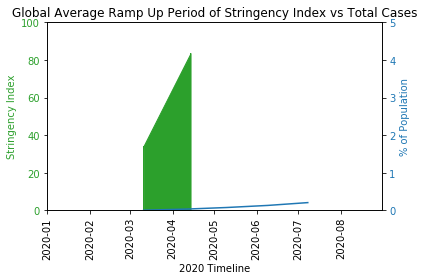

In [38]:
# Create comparison plot - Global Average Ramp Up
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('2020 Timeline')
ax1.set_ylabel('Stringency Index', color=color)
ax1.bar(x_axis_as, y_axis_as, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.fill_between(x_axis_as,y_axis_as,color=color)
plt.xlim(start,end)
plt.ylim(0,100)
plt.xticks(rotation = 90)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('% of Population', color=color)  # we already handled the x-label with ax1
ax2.plot(x_axis_ac, y_axis_ac, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim(0,5)

plt.title("Global Average Ramp Up Period of Stringency Index vs Total Cases")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

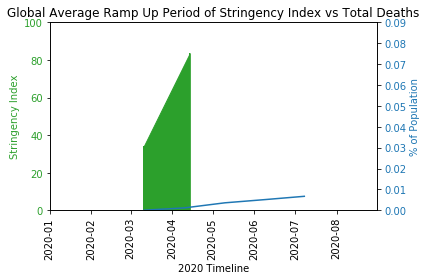

In [39]:
# Create comparison plot - Global Average Ramp Up
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('2020 Timeline')
ax1.set_ylabel('Stringency Index', color=color)
ax1.bar(x_axis_as, y_axis_as, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.fill_between(x_axis_as,y_axis_as,color=color)
plt.xlim(start,end)
plt.ylim(0,100)
plt.xticks(rotation = 90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('% of Population', color=color)  # we already handled the x-label with ax1
ax2.plot(x_axis_ac, y_axis_ad, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim(0,0.09)

plt.title("Global Average Ramp Up Period of Stringency Index vs Total Deaths")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [40]:
# # To export to JSON for dashboard purposes
# ramp_up_json = pd.DataFrame(ramp_up_details)
# ramp_up_json['country'] = ramp_up_json.index
# ramp_up_json.reset_index(drop=True,inplace=True)
# ramp_up_json = ramp_up_json[['country',
#                              'min_stringency',
#                              'max_stringency',
#                              'ramp_start',
#                              'ramp_end',
#                              'ramp_length',
#                              'thirty_days',
#                              'sixty_days',
#                              'ninety_days',
#                              'one_twenty_days',
#                              'percent_pop_cases_beg',
#                              'percent_pop_cases_30',
#                              'percent_pop_cases_60',
#                              'percent_pop_cases_90',
#                              'percent_pop_cases_120',
#                              'percent_pop_deaths_beg',
#                              'percent_pop_deaths_30',
#                              'percent_pop_deaths_60',
#                              'percent_pop_deaths_90',
#                              'percent_pop_deaths_120'
#                             ]]

# combo = [global_averages,ramp_up_json]
# ramp_up_all_json = pd.concat(combo)
# ramp_up_all_json.reset_index(drop=True,inplace=True)

In [41]:
# ramp_up_all_json.columns

In [42]:
# rampUpCounts = {
#     "countries":[],
#     "counts":[]
#     }

In [43]:
# rampUpCounts

In [44]:
# # list of countries
# countries_list = list(ramp_up_all_json.country.unique())
# print(len(countries_list))

# for country in countries_list:
#     rampUpCounts['countries'].append(country)

# print(rampUpCounts['countries'])

In [45]:
# for i in range(0,163):
#     country = countries_list[i]
#     countryLoc = ramp_up_all_json.loc[ramp_up_all_json.country == country]
    
#     countsDict = {}
    
#     countsDict['country_name'] = country
#     countsDict['min_stringency'] = list(countryLoc['min_stringency'])
#     countsDict['max_stringency'] = list(countryLoc['max_stringency'])
#     start = countryLoc['ramp_start'].astype(str)
#     start = list(start)
#     countsDict['ramp_start'] = start
#     end = countryLoc['ramp_end'].astype(str)
#     end = list(end)
#     countsDict['ramp_end'] = end
#     length = countryLoc['ramp_length'].astype(str)
#     length = list(length)
#     countsDict['ramp_length'] = length
#     thirty = countryLoc['thirty_days'].dt.strftime('%Y-%m-%d')
#     thirty = list(thirty)
#     countsDict['thirty_days'] = thirty
#     sixty = countryLoc['sixty_days'].dt.strftime('%Y-%m-%d')
#     sixty = list(sixty)
#     countsDict['sixty_days'] = sixty
#     ninety = countryLoc['ninety_days'].dt.strftime('%Y-%m-%d')
#     ninety = list(ninety)
#     countsDict['ninety_days'] = ninety
#     onetwenty = countryLoc['one_twenty_days'].dt.strftime('%Y-%m-%d')
#     onetwenty = list(onetwenty)
#     countsDict['one_twenty_days'] = onetwenty
#     countsDict['percent_pop_cases_beg'] = list(countryLoc['percent_pop_cases_beg'])
#     countsDict['percent_pop_cases_30'] = list(countryLoc['percent_pop_cases_30'])
#     countsDict['percent_pop_cases_60'] = list(countryLoc['percent_pop_cases_60'])
#     countsDict['percent_pop_cases_90'] = list(countryLoc['percent_pop_cases_90'])
#     countsDict['percent_pop_cases_120'] = list(countryLoc['percent_pop_cases_120'])
#     countsDict['percent_pop_deaths_beg'] = list(countryLoc['percent_pop_deaths_beg'])
#     countsDict['percent_pop_deaths_30'] = list(countryLoc['percent_pop_deaths_30'])
#     countsDict['percent_pop_deaths_60'] = list(countryLoc['percent_pop_deaths_60'])
#     countsDict['percent_pop_deaths_90'] = list(countryLoc['percent_pop_deaths_90'])
#     countsDict['percent_pop_deaths_120'] = list(countryLoc['percent_pop_deaths_120'])
    
#     rampUpCounts['counts'].append(countsDict)
    
# print(rampUpCounts)

In [46]:
# # export as json
# with open('rampUpCounts.json', 'w') as outfile:
#     json.dump(rampUpCounts, outfile)

# Specific Country Analysis

In [47]:
countries = ramp_up_details.index.tolist()
print(countries)

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guam', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'L

In [48]:
country_filter = (input("What country do you want to analyze?"))

What country do you want to analyze?Colombia


In [49]:
country = ramp_up_details.loc[ramp_up_details.index == country_filter].copy()

In [50]:
country

,min_stringency,max_stringency,ramp_start,ramp_end,ramp_length,population,total_tests_beg,percent_pop_tests_beg,total_cases_beg,percent_pop_cases_beg,...,one_twenty_days,total_tests_120,percent_pop_tests_120,120_Days_Percentage_Change_Tests,total_cases_120,percent_pop_cases_120,120_Days_Percentage_Change_Cases,total_deaths_120,percent_pop_deaths_120,120_Days_Percentage_Change_Deaths
country,,,,,,,,,,,,,,,,,,,,,
Colombia,34.26,90.74,2020-03-12,2020-04-27,46 days,50882884.0,1393.0,0.002738,9.0,0.000018,...,2020-07-10 00:00:00,968465.0,1.903322,69423.689878,133973.0,0.263297,1.488489e+06,4714.0,0.009264,0.0


In [51]:
# Create lists - ramp up and total cases
ramp_beg = country['ramp_start'].to_list()
ramp_end = country['ramp_end'].to_list()

ramp_length = country['ramp_length'][0].days

stringency_min = country['min_stringency'].to_list()
stringency_max = country['max_stringency'].to_list()

ramp_beg_cases = country['percent_pop_cases_beg'].to_list()
thirty_cases = country['percent_pop_cases_30'].to_list()
sixty_cases = country['percent_pop_cases_60'].to_list()
ninety_cases = country['percent_pop_cases_90'].to_list()
one_twenty_cases = country['percent_pop_cases_120'].to_list()

ramp_beg_deaths = country['percent_pop_deaths_beg'].to_list()
thirty_deaths = country['percent_pop_deaths_30'].to_list()
sixty_deaths = country['percent_pop_deaths_60'].to_list()
ninety_deaths = country['percent_pop_deaths_90'].to_list()
one_twenty_deaths = country['percent_pop_deaths_120'].to_list()

ramp_beg_date = country['ramp_start'].to_list()
thirty_date = country['thirty_days'].to_list()
sixty_date = country['sixty_days'].to_list()
ninety_date = country['ninety_days'].to_list()
one_twenty_date = country['one_twenty_days'].to_list()

start = merged_covid_df.date_updated.min()
start = pd.to_datetime(start)
end = merged_covid_df.date_updated.max()
end = pd.to_datetime(end)

In [52]:
# Set the x and y axis for ramp up and for total cases
x_axis = ramp_beg + ramp_end
x_axis = pd.to_datetime(x_axis)
y_axis = stringency_min + stringency_max

x_axis1 = ramp_beg_date + thirty_date + sixty_date + ninety_date + one_twenty_date
x_axis1 = pd.to_datetime(x_axis1)

y_axis1 = ramp_beg_cases + thirty_cases + sixty_cases + ninety_cases + one_twenty_cases
y_axis2 = ramp_beg_deaths + thirty_deaths + sixty_deaths + ninety_deaths + one_twenty_deaths

In [53]:
# To detemine adjusted x_axis for calculation of slope and y axis limit 
print(merged_covid_df['percentage_of_Pop_Total_Cases'].max())
print(merged_covid_df['percentage_of_Pop_Total_Deaths'].max())

# Max amount is 4.11, therefore 5 will be maximum x_axis value
x_axis0 = [1,2,3,4,5]

# X_axis based on average length 
x_axis_stringency = [0,ramp_length]

4.115672703796519
0.0873108530229093


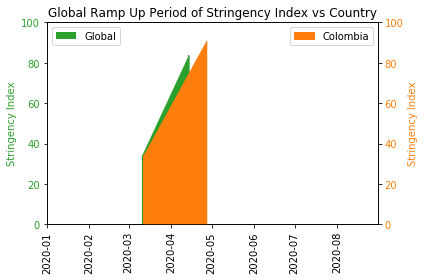

In [54]:
# Create comparison plot - Global Average Ramp Up vs Country Ramp Up
fig, ax1 = plt.subplots()
color = 'tab:green'
ax1.set_ylabel('Stringency Index', color=color)
ax1.bar(x_axis_as, y_axis_as, color=color, label="Global")
ax1.tick_params(axis='y', labelcolor=color)
ax1.fill_between(x_axis_as,y_axis_as,color=color)
plt.xlim(start,end)
plt.ylim(0,100)
plt.xticks(rotation = 90)
plt.legend(loc=2)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_xlabel('2020 Timeline')
ax2.set_ylabel('Stringency Index', color=color)
ax2.bar(x_axis, y_axis, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.fill_between(x_axis,y_axis,color=color)
plt.ylim(0,100)
plt.legend(country.index,loc=1)

plt.title("Global Ramp Up Period of Stringency Index vs Country")


plt.xlim(start,end)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

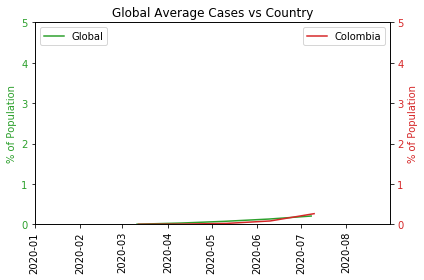

In [55]:
# Create comparison plot - Global Average Cases vs Country
fig, ax1 = plt.subplots()
color = 'tab:green'
ax1.set_ylabel('% of Population', color=color)  # we already handled the x-label with ax1
ax1.plot(x_axis_ac, y_axis_ac, color=color, label="Global")
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(0,5)
plt.xlim(start,end)
plt.xticks(rotation = 90)
plt.legend(loc=2)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('% of Population', color=color)  # we already handled the x-label with ax1
ax2.plot(x_axis1, y_axis1, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim(0,5)
plt.legend(country.index,loc=1)

plt.title("Global Average Cases vs Country")

plt.xlim(start,end)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

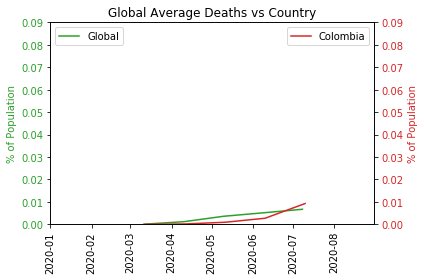

In [56]:
# Create comparison plot - Global Average Deaths vs Country
fig, ax1 = plt.subplots()
color = 'tab:green'
ax1.set_ylabel('% of Population', color=color)  
ax1.plot(x_axis_ac, y_axis_ad, color=color, label="Global")
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(0,0.09)
plt.xlim(start,end)
plt.xticks(rotation = 90)
plt.legend(loc=2)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('% of Population', color=color)  
ax2.plot(x_axis1, y_axis2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim(0,0.09)

plt.title("Global Average Deaths vs Country")
plt.legend(country.index,loc=1)

plt.xlim(start,end)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

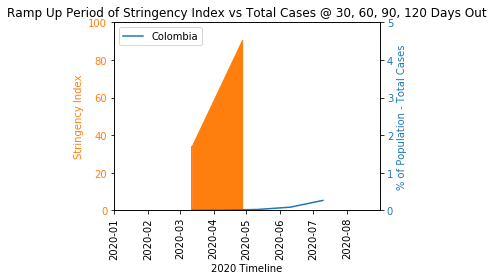

In [57]:
# Create comparison plot - Ramp Up vs Future Total % of Population - Cases
fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('2020 Timeline')
ax1.set_ylabel('Stringency Index', color=color)
ax1.bar(x_axis, y_axis, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.fill_between(x_axis,y_axis,color=color)
plt.ylim(0,100)
plt.xticks(rotation = 90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('% of Population - Total Cases', color=color)  
ax2.plot(x_axis1, y_axis1, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim(0,5)

plt.title("Ramp Up Period of Stringency Index vs Total Cases @ 30, 60, 90, 120 Days Out")
plt.legend(country.index, loc=2)

plt.xlim(start,end)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [58]:
# Slope of Line - stringency
a = x_axis_stringency
b = y_axis
slope_stringency = linregress(a,b).slope

In [59]:
slope_stringency

1.2278260869565216

In [60]:
# Slope of Line - % of pop total cases
a = x_axis0
b = y_axis1
slope_cases = linregress(a,b).slope

In [61]:
slope_cases

0.06043938075522606

In [62]:
# To detemine adjusted x_axis for calculation of slope and y axis limit 
print(merged_covid_df['percentage_of_Pop_Total_Deaths'].max())

# Max amount is 4.11, therefore 5 will be maximum x_axis value
x_axis00 = [0.01,0.03,0.05,0.07,0.09]

0.0873108530229093


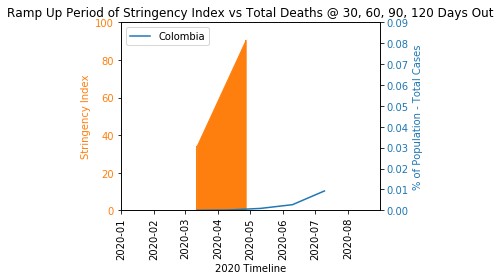

In [63]:
# Create comparison plot - Ramp Up vs Future Total % of Population - Deaths
fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('2020 Timeline')
ax1.set_ylabel('Stringency Index', color=color)
ax1.bar(x_axis, y_axis, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.fill_between(x_axis,y_axis,color=color)
plt.ylim(0,100)
plt.xticks(rotation = 90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('% of Population - Total Cases', color=color)  
ax2.plot(x_axis1, y_axis2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim(0,0.09)

plt.title("Ramp Up Period of Stringency Index vs Total Deaths @ 30, 60, 90, 120 Days Out")
plt.legend(country.index, loc=2)

plt.xlim(start,end)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [64]:
# Slope of Line - % of pop total deaths
a = x_axis00
b = y_axis2
slope_deaths = linregress(a,b).slope

In [65]:
slope_deaths

0.10533994103007212

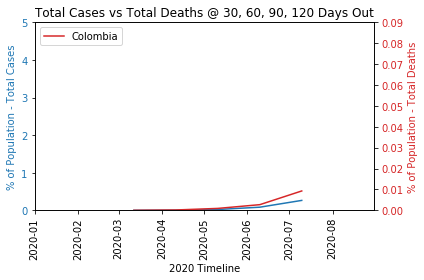

In [66]:
# Create comparison plot - Ramp Up vs Future Total % of Population - Deaths
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('2020 Timeline')
ax1.set_ylabel('% of Population - Total Cases', color=color)
ax1.plot(x_axis1, y_axis1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(0,5)
plt.xticks(rotation = 90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('% of Population - Total Deaths', color=color)  
ax2.plot(x_axis1, y_axis2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim(0,0.09)

plt.title("Total Cases vs Total Deaths @ 30, 60, 90, 120 Days Out")
plt.legend(country.index, loc=2)

plt.xlim(start,end)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Creating final ranking system

In [67]:
ramp_up_details.head()

,min_stringency,max_stringency,ramp_start,ramp_end,ramp_length,population,total_tests_beg,percent_pop_tests_beg,total_cases_beg,percent_pop_cases_beg,...,one_twenty_days,total_tests_120,percent_pop_tests_120,120_Days_Percentage_Change_Tests,total_cases_120,percent_pop_cases_120,120_Days_Percentage_Change_Cases,total_deaths_120,percent_pop_deaths_120,120_Days_Percentage_Change_Deaths
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,27.78,84.26,2020-03-01,2020-04-12,42 days,38928341.0,0.0,0.00000,1.0,0.000003,...,2020-06-29 00:00:00,0.0,0.000000,0.000000,30967.0,0.079549,3.096600e+06,721.0,0.001852,0.0
Albania,36.11,89.81,2020-03-09,2020-04-18,40 days,2877800.0,0.0,0.00000,2.0,0.000069,...,2020-07-07 00:00:00,0.0,0.000000,0.000000,2964.0,0.102995,1.481000e+05,79.0,0.002745,0.0
Algeria,16.67,92.13,2020-03-10,2020-04-14,35 days,43851043.0,0.0,0.00000,20.0,0.000046,...,2020-07-08 00:00:00,0.0,0.000000,0.000000,16879.0,0.038492,8.429500e+04,968.0,0.002207,0.0
Angola,33.33,90.74,2020-03-24,2020-03-27,3 days,32866268.0,0.0,0.00000,2.0,0.000006,...,2020-07-22 00:00:00,0.0,0.000000,0.000000,749.0,0.002279,3.735000e+04,29.0,0.000088,0.0
Argentina,25.00,100.00,2020-03-11,2020-03-23,12 days,45195777.0,158.0,0.00035,19.0,0.000042,...,2020-07-09 00:00:00,383998.0,0.849632,242936.708861,83413.0,0.184559,4.389158e+05,1654.0,0.003660,165300.0


In [68]:
name = []
slope_ramp = []
length_ramp = []
max_stringency = []
slope_cases = []
slope_deaths = []

In [69]:
for location in countries:
    
    country = ramp_up_details.loc[ramp_up_details.index == location]

    country_name = location
    ramp_length = country.ramp_length.to_list()
    
    # Create lists - ramp up, total cases, total deaths
    
    ramp_beg = country['ramp_start'].to_list()
    ramp_end = country['ramp_end'].to_list()

    ramp_length = country['ramp_length'][0].days

    stringency_min = country['min_stringency'].to_list()
    stringency_max = country['max_stringency'].to_list()
    
    ramp_end_date = country['ramp_end'].to_list()
    thirty_date = country['thirty_days'].to_list()
    sixty_date = country['sixty_days'].to_list()
    ninety_date = country['ninety_days'].to_list()
    one_twenty_date = country['one_twenty_days'].to_list()

    ramp_end_cases = country['percent_pop_cases_end'].to_list()
    thirty_cases = country['percent_pop_cases_30'].to_list()
    sixty_cases = country['percent_pop_cases_60'].to_list()
    ninety_cases = country['percent_pop_cases_90'].to_list()
    one_twenty_cases = country['percent_pop_cases_120'].to_list()

    ramp_end_deaths = country['percent_pop_deaths_end'].to_list()
    thirty_deaths = country['percent_pop_deaths_30'].to_list()
    sixty_deaths = country['percent_pop_deaths_60'].to_list()
    ninety_deaths = country['percent_pop_deaths_90'].to_list()
    one_twenty_deaths = country['percent_pop_deaths_120'].to_list()

    start = merged_covid_df.date_updated.min()
    start = pd.to_datetime(start)
    end = merged_covid_df.date_updated.max()
    end = pd.to_datetime(end)
    
    # Set the x and y axis 
    # Ramp Up 
    x_axis_stringency = [0,ramp_length]
    y_axis_stringency = stringency_min + stringency_max

    # Total Cases
    x_axis_cases = [1,2,3,4,5]
    y_axis_cases = ramp_end_cases + thirty_cases + sixty_cases + ninety_cases + one_twenty_cases
    
    # Total Deaths
    x_axis_deaths = [0.01,0.03,0.05,0.07,0.09]
    y_axis_deaths = ramp_end_deaths + thirty_deaths + sixty_deaths + ninety_deaths + one_twenty_deaths
    
    # Slope of Line - stringency
    a_str = x_axis_stringency
    b_str = y_axis_stringency
    slope_stringency = linregress(a_str,b_str).slope
    
    # Slope of Line - total cases
    a_case = x_axis_cases
    b_case = y_axis_cases
    cases_slope = linregress(a_case,b_case).slope
    
    # Slope of Line - total deaths
    a_death = x_axis_deaths
    b_death = y_axis_deaths
    deaths_slope = linregress(a_death,b_death).slope
        
    name.append(country_name)
    length_ramp.append(ramp_length)
    max_stringency.append(stringency_max)
    slope_ramp.append(slope_stringency)
    slope_cases.append(cases_slope)
    slope_deaths.append(deaths_slope)
    
# Create date shifted DataFrames
ramp_up_ranking = pd.DataFrame({"country": name,
                               "slope_ramp" : slope_ramp,
                                "ramp_length" : length_ramp,
                                "max_stringency" : max_stringency,
                                "slope_ramp" : slope_ramp,
                                "slope_cases" : slope_cases,
                                "slope_deaths" : slope_deaths
                               })

ramp_up_ranking.set_index(ramp_up_ranking['country'],inplace=True)
ramp_up_ranking.drop(['country'],axis=1,inplace=True)

C:\Users\twin_\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm


In [70]:
ramp_up_ranking.head()

,slope_ramp,ramp_length,max_stringency,slope_cases,slope_deaths
country,,,,,
Afghanistan,1.344762,42,[84.26],0.019382,0.021629
Albania,1.342500,40,[89.81],0.023535,0.029536
Algeria,2.156000,35,[92.13],0.009646,0.027799
Angola,19.136667,3,[90.74],0.000501,0.000989
Argentina,6.250000,12,[100.0],0.041708,0.043367


In [71]:
print(ramp_up_ranking.slope_ramp .loc[ramp_up_ranking.slope_ramp.isnull()==True].copy())
clear = ramp_up_ranking.loc[ramp_up_ranking.slope_ramp.isnull()==True].copy()
clear_list = clear.index.tolist()
clear_list

country
Belarus       NaN
Botswana      NaN
Nicaragua     NaN
Niger         NaN
Puerto Rico   NaN
Name: slope_ramp, dtype: float64


['Belarus', 'Botswana', 'Nicaragua', 'Niger', 'Puerto Rico']

In [72]:
# Determined to make all null values withing slope_ramp and length = 0 as technically there is no change in ramp up and no length
ramp_up_ranking['slope_ramp'] = ramp_up_ranking['slope_ramp'].fillna(0)
ramp_up_ranking['ramp_length'] = ramp_up_ranking['ramp_length'].fillna(0)

In [73]:
# verify
print(ramp_up_ranking.slope_ramp.loc[ramp_up_ranking.slope_ramp.isnull()==True].copy())

Series([], Name: slope_ramp, dtype: float64)


In [74]:
# Create ranking columns
# High = Good
ramp_up_ranking['rank_slope'] = ramp_up_ranking['slope_ramp'].rank(ascending=False)

# High = Bad
ramp_up_ranking['rank_ramp'] = ramp_up_ranking['ramp_length'].rank()
ramp_up_ranking['rank_cases'] = ramp_up_ranking['slope_cases'].rank()
ramp_up_ranking['rank_deaths'] = ramp_up_ranking['slope_deaths'].rank()

# Total ranking
ramp_up_ranking["ramp_rank"] = ramp_up_ranking['rank_slope'] + ramp_up_ranking['rank_ramp']
ramp_up_ranking['total_ranking_cases'] = ramp_up_ranking['rank_slope'] + ramp_up_ranking['rank_ramp'] + ramp_up_ranking['rank_cases'] 
ramp_up_ranking['total_ranking_deaths'] = ramp_up_ranking['rank_slope'] + ramp_up_ranking['rank_ramp'] + ramp_up_ranking['rank_deaths'] 
ramp_up_ranking['total_ranking'] = ramp_up_ranking['rank_slope'] + ramp_up_ranking['rank_ramp'] + ramp_up_ranking['rank_cases'] + ramp_up_ranking['rank_deaths'] 

# Overall ranking
ramp_up_ranking['ramp_up_rank'] = ramp_up_ranking['ramp_rank'].rank()
ramp_up_ranking['overall_rank_cases'] = ramp_up_ranking['total_ranking_cases'].rank()
ramp_up_ranking['overall_rank_deaths'] = ramp_up_ranking['total_ranking_deaths'].rank()
ramp_up_ranking['overall_rank'] = ramp_up_ranking['total_ranking'].rank()

In [75]:
ramp_up_ranking = ramp_up_ranking[[
                                   "slope_ramp",
                                   "rank_slope",
                                   "rank_ramp",
                                   "ramp_up_rank",
                                   "slope_cases",
                                   "rank_cases",
                                   "slope_deaths",
                                   "rank_deaths",
                                   "overall_rank_cases",
                                   "overall_rank_deaths",
                                   "overall_rank"
                                  ]]

In [76]:
ramp_up_ranking

,slope_ramp,rank_slope,rank_ramp,ramp_up_rank,slope_cases,rank_cases,slope_deaths,rank_deaths,overall_rank_cases,overall_rank_deaths,overall_rank
country,,,,,,,,,,,
Afghanistan,1.344762,102.0,117.0,112.0,0.019382,86.0,0.021629,86.0,116.0,116.0,110.0
Albania,1.342500,103.0,115.0,111.0,0.023535,95.0,0.029536,98.0,123.0,124.0,121.5
Algeria,2.156000,74.0,108.5,94.5,0.009646,68.0,0.027799,95.0,85.0,97.0,91.0
Angola,19.136667,2.0,8.0,2.0,0.000501,8.0,0.000989,21.0,2.0,2.0,2.0
Argentina,6.250000,15.5,36.5,23.0,0.041708,112.0,0.043367,106.0,36.0,31.0,47.5
...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.151224,156.0,154.0,159.5,0.007770,59.0,0.003534,35.0,144.0,140.0,118.5
Vietnam,1.161111,113.0,143.5,137.0,0.000093,3.0,0.000000,6.0,92.0,86.5,45.0
Yemen,0.837619,127.0,69.5,101.0,0.001634,21.0,0.022933,89.0,60.0,103.0,68.0


In [77]:
ramp_up_ranking.sort_values(by=['overall_rank']).tail(10)

,slope_ramp,rank_slope,rank_ramp,ramp_up_rank,slope_cases,rank_cases,slope_deaths,rank_deaths,overall_rank_cases,overall_rank_deaths,overall_rank
country,,,,,,,,,,,
El Salvador,0.236383,151.0,127.5,147.0,0.041641,111.0,0.056042,116.0,151.0,155.0,153.0
Suriname,0.326765,147.0,146.0,153.0,0.052997,116.0,0.046878,111.0,154.0,157.0,154.0
Iceland,0.726078,131.0,134.0,141.0,0.158300,150.0,0.043956,107.0,155.5,150.5,155.0
Guam,0.175490,154.0,160.0,161.0,0.039222,110.0,0.029624,99.0,159.5,159.0,156.0
Peru,1.561373,94.0,134.0,118.0,0.248770,159.0,0.420040,152.0,150.0,154.0,157.0
Kuwait,1.031714,117.0,147.0,140.0,0.268611,160.0,0.104202,134.0,159.5,156.0,158.0
Italy,1.028889,118.0,148.5,142.0,0.110310,139.0,0.778268,160.0,153.0,160.0,159.0
Brazil,0.968889,121.0,139.0,138.0,0.199065,155.0,0.413339,151.0,155.5,158.0,160.0
Iran,0.318696,149.0,159.0,158.0,0.063473,122.0,0.149888,139.0,161.0,162.0,161.0


In [78]:
top_5_cases = ramp_up_ranking.sort_values(by=['overall_rank_cases']).head(5)
top_5_cases

,slope_ramp,rank_slope,rank_ramp,ramp_up_rank,slope_cases,rank_cases,slope_deaths,rank_deaths,overall_rank_cases,overall_rank_deaths,overall_rank
country,,,,,,,,,,,
Laos,16.900000,3.0,11.0,3.0,0.000047,2.0,0.000000,6.0,1.0,1.0,1.0
Angola,19.136667,2.0,8.0,2.0,0.000501,8.0,0.000989,21.0,2.0,2.0,2.0
Jordan,22.223333,1.0,8.0,1.0,0.002823,34.0,0.001078,23.0,3.0,3.0,5.0
Rwanda,9.908000,5.0,13.5,6.0,0.002434,29.0,0.000386,15.0,4.0,4.0,4.0
Uganda,5.787500,22.0,22.0,19.0,0.000618,11.0,0.000000,6.0,5.0,5.0,3.0


In [79]:
top_5_deaths = ramp_up_ranking.sort_values(by=['overall_rank_deaths']).head(5)
top_5_deaths

,slope_ramp,rank_slope,rank_ramp,ramp_up_rank,slope_cases,rank_cases,slope_deaths,rank_deaths,overall_rank_cases,overall_rank_deaths,overall_rank
country,,,,,,,,,,,
Laos,16.900000,3.0,11.0,3.0,0.000047,2.0,0.000000,6.0,1.0,1.0,1.0
Angola,19.136667,2.0,8.0,2.0,0.000501,8.0,0.000989,21.0,2.0,2.0,2.0
Jordan,22.223333,1.0,8.0,1.0,0.002823,34.0,0.001078,23.0,3.0,3.0,5.0
Rwanda,9.908000,5.0,13.5,6.0,0.002434,29.0,0.000386,15.0,4.0,4.0,4.0
Uganda,5.787500,22.0,22.0,19.0,0.000618,11.0,0.000000,6.0,5.0,5.0,3.0


In [80]:
# top_5_overall = ramp_up_ranking.sort_values(by=['overall_rank']).head(5)
# top_5_overall

In [81]:
bottom_5_cases = ramp_up_ranking.sort_values(by=['overall_rank_cases'],ascending=False).head(5)
bottom_5_cases

,slope_ramp,rank_slope,rank_ramp,ramp_up_rank,slope_cases,rank_cases,slope_deaths,rank_deaths,overall_rank_cases,overall_rank_deaths,overall_rank
country,,,,,,,,,,,
Chile,0.610273,137.0,155.0,152.0,0.409747,161.0,0.438005,153.0,162.0,161.0,162.0
Iran,0.318696,149.0,159.0,158.0,0.063473,122.0,0.149888,139.0,161.0,162.0,161.0
Guam,0.175490,154.0,160.0,161.0,0.039222,110.0,0.029624,99.0,159.5,159.0,156.0
Kuwait,1.031714,117.0,147.0,140.0,0.268611,160.0,0.104202,134.0,159.5,156.0,158.0
Singapore,0.801829,129.0,152.0,148.0,0.117366,142.0,0.004872,44.0,158.0,131.0,142.0


In [82]:
bottom_5_deaths = ramp_up_ranking.sort_values(by=['overall_rank_deaths'],ascending=False).head(5)
bottom_5_deaths

,slope_ramp,rank_slope,rank_ramp,ramp_up_rank,slope_cases,rank_cases,slope_deaths,rank_deaths,overall_rank_cases,overall_rank_deaths,overall_rank
country,,,,,,,,,,,
Iran,0.318696,149.0,159.0,158.0,0.063473,122.0,0.149888,139.0,161.0,162.0,161.0
Chile,0.610273,137.0,155.0,152.0,0.409747,161.0,0.438005,153.0,162.0,161.0,162.0
Italy,1.028889,118.0,148.5,142.0,0.110310,139.0,0.778268,160.0,153.0,160.0,159.0
Guam,0.175490,154.0,160.0,161.0,0.039222,110.0,0.029624,99.0,159.5,159.0,156.0
Brazil,0.968889,121.0,139.0,138.0,0.199065,155.0,0.413339,151.0,155.5,158.0,160.0


In [83]:
# bottom_5_overall = ramp_up_ranking.sort_values(by=['overall_rank'],ascending=False).head(5)
# bottom_5_overall

In [84]:
print("Top 5 Countries - Based on Total Cases")
top_5_cases_countries = top_5_cases.index.tolist()
print(top_5_cases_countries)
print("---------------------------------------------------------------")
print("Bottom 5 Countries - Based on Total Cases")
bottom_5_cases_countries = bottom_5_cases.index.tolist()
print(bottom_5_cases_countries)
print("---------------------------------------------------------------")
print("Top 5 Countries - Based on Total Deaths")
top_5_deaths_countries = top_5_deaths.index.tolist()
print(top_5_deaths_countries)
# print("---------------------------------------------------------------")
# print("Top 5 Countries - Overall")
# top_5_overall_countries = top_5_overall.index.tolist()
# print(top_5_overall_countries)
print("---------------------------------------------------------------")
print("Bottom 5 Countries - Based on Total Deaths")
bottom_5_deaths_countries = bottom_5_deaths.index.tolist()
print(bottom_5_deaths_countries)
# print("---------------------------------------------------------------")
# print("Botom 5 Countries - Overall")
# bottom_5_overall_countries = bottom_5_overall.index.tolist()
# print(bottom_5_overall_countries)

Top 5 Countries - Based on Total Cases
['Laos', 'Angola', 'Jordan', 'Rwanda', 'Uganda']
---------------------------------------------------------------
Bottom 5 Countries - Based on Total Cases
['Chile', 'Iran', 'Guam', 'Kuwait', 'Singapore']
---------------------------------------------------------------
Top 5 Countries - Based on Total Deaths
['Laos', 'Angola', 'Jordan', 'Rwanda', 'Uganda']
---------------------------------------------------------------
Bottom 5 Countries - Based on Total Deaths
['Iran', 'Chile', 'Italy', 'Guam', 'Brazil']


In [85]:
cases = pd.concat([top_5_cases, bottom_5_cases], axis=0)
cases = cases[["slope_ramp","rank_slope","rank_ramp","slope_cases","rank_cases","slope_deaths","rank_deaths"]]
cases

,slope_ramp,rank_slope,rank_ramp,slope_cases,rank_cases,slope_deaths,rank_deaths
country,,,,,,,
Laos,16.900000,3.0,11.0,0.000047,2.0,0.000000,6.0
Angola,19.136667,2.0,8.0,0.000501,8.0,0.000989,21.0
Jordan,22.223333,1.0,8.0,0.002823,34.0,0.001078,23.0
Rwanda,9.908000,5.0,13.5,0.002434,29.0,0.000386,15.0
Uganda,5.787500,22.0,22.0,0.000618,11.0,0.000000,6.0
Chile,0.610273,137.0,155.0,0.409747,161.0,0.438005,153.0
Iran,0.318696,149.0,159.0,0.063473,122.0,0.149888,139.0
Guam,0.175490,154.0,160.0,0.039222,110.0,0.029624,99.0
Kuwait,1.031714,117.0,147.0,0.268611,160.0,0.104202,134.0


In [86]:
deaths = pd.concat([top_5_deaths, bottom_5_deaths], axis=0)
deaths = deaths[["slope_ramp","rank_slope","rank_ramp","slope_cases","rank_cases","slope_deaths","rank_deaths"]]
deaths

,slope_ramp,rank_slope,rank_ramp,slope_cases,rank_cases,slope_deaths,rank_deaths
country,,,,,,,
Laos,16.900000,3.0,11.0,0.000047,2.0,0.000000,6.0
Angola,19.136667,2.0,8.0,0.000501,8.0,0.000989,21.0
Jordan,22.223333,1.0,8.0,0.002823,34.0,0.001078,23.0
Rwanda,9.908000,5.0,13.5,0.002434,29.0,0.000386,15.0
Uganda,5.787500,22.0,22.0,0.000618,11.0,0.000000,6.0
Iran,0.318696,149.0,159.0,0.063473,122.0,0.149888,139.0
Chile,0.610273,137.0,155.0,0.409747,161.0,0.438005,153.0
Italy,1.028889,118.0,148.5,0.110310,139.0,0.778268,160.0
Guam,0.175490,154.0,160.0,0.039222,110.0,0.029624,99.0


# Plot the top/bottom 5 countries against the global average

In [87]:
# Create separate dataframes for each category
ramp_up_details_top_5_cases = ramp_up_details[ramp_up_details.index.isin(top_5_cases_countries)]
ramp_up_details_top_5_deaths = ramp_up_details[ramp_up_details.index.isin(top_5_deaths_countries)]

ramp_up_details_bottom_5_cases = ramp_up_details[ramp_up_details.index.isin(bottom_5_cases_countries)]
ramp_up_details_bottom_5_deaths = ramp_up_details[ramp_up_details.index.isin(bottom_5_deaths_countries)]

In [88]:
# Stack the DataFrames on top of each other
vertical_stack_cases = pd.concat([ramp_up_details_top_5_cases, ramp_up_details_bottom_5_cases], axis=0)

vertical_stack_deaths = pd.concat([ramp_up_details_top_5_deaths, ramp_up_details_bottom_5_deaths], axis=0)

In [89]:
vertical_stack_cases

,min_stringency,max_stringency,ramp_start,ramp_end,ramp_length,population,total_tests_beg,percent_pop_tests_beg,total_cases_beg,percent_pop_cases_beg,...,one_twenty_days,total_tests_120,percent_pop_tests_120,120_Days_Percentage_Change_Tests,total_cases_120,percent_pop_cases_120,120_Days_Percentage_Change_Cases,total_deaths_120,percent_pop_deaths_120,120_Days_Percentage_Change_Deaths
country,,,,,,,,,,,,,,,,,,,,,
Angola,33.33,90.74,2020-03-24,2020-03-27,3 days,32866268.0,0.0,0.0,2.0,0.000006,...,2020-07-22 00:00:00,0.0,0.000000,0.0,749.0,0.002279,37350.000000,29.0,0.000088,0.0
Jordan,33.33,100.00,2020-03-15,2020-03-18,3 days,10203140.0,0.0,0.0,1.0,0.000010,...,2020-07-13 00:00:00,0.0,0.000000,0.0,1179.0,0.011555,117800.000000,10.0,0.000098,0.0
Laos,28.70,96.30,2020-03-26,2020-03-30,4 days,7275556.0,0.0,0.0,2.0,0.000027,...,2020-07-24 00:00:00,0.0,0.000000,0.0,19.0,0.000261,850.000000,0.0,0.000000,0.0
Rwanda,41.20,90.74,2020-03-16,2020-03-21,5 days,12952209.0,0.0,0.0,5.0,0.000039,...,2020-07-14 00:00:00,192379.0,1.485299,0.0,1378.0,0.010639,27460.000000,4.0,0.000031,0.0
Uganda,47.22,93.52,2020-03-22,2020-03-30,8 days,45741000.0,0.0,0.0,1.0,0.000002,...,2020-07-20 00:00:00,250029.0,0.546619,0.0,1065.0,0.002328,106400.000000,0.0,0.000000,0.0
Chile,22.22,89.35,2020-03-15,2020-07-03,110 days,19116209.0,0.0,0.0,61.0,0.000319,...,2020-07-13 00:00:00,1310265.0,6.854209,0.0,315041.0,1.648031,516360.655738,6979.0,0.036508,0.0
Guam,52.78,79.63,2020-03-20,2020-08-20,153 days,168783.0,0.0,0.0,12.0,0.007110,...,2020-07-18 00:00:00,0.0,0.000000,0.0,315.0,0.186630,2525.000000,5.0,0.002962,0.0
Iran,20.37,64.35,2020-02-26,2020-07-13,138 days,83992953.0,0.0,0.0,95.0,0.000113,...,2020-06-25 00:00:00,1530437.0,1.822102,0.0,212501.0,0.252999,223585.263158,9996.0,0.011901,66540.0
Kuwait,27.78,100.00,2020-03-01,2020-05-10,70 days,4270563.0,0.0,0.0,45.0,0.001054,...,2020-06-29 00:00:00,382842.0,8.964673,0.0,44942.0,1.052367,99771.111111,348.0,0.008149,0.0


In [90]:
vertical_stack_cases = vertical_stack_cases[["min_stringency","max_stringency","ramp_length","percent_pop_cases_end","percent_pop_cases_30","percent_pop_cases_60","percent_pop_cases_90","percent_pop_cases_120"]]
vertical_stack_deaths = vertical_stack_deaths[["min_stringency","max_stringency","ramp_length","percent_pop_deaths_end","percent_pop_deaths_30","percent_pop_deaths_60","percent_pop_deaths_90","percent_pop_deaths_120"]]

In [91]:
# vertical_stack_cases
x_axis=[0,30,60,90,120]
Angola = [vertical_stack_cases.percent_pop_cases_end[0],vertical_stack_cases.percent_pop_cases_30[0],vertical_stack_cases.percent_pop_cases_60[0],vertical_stack_cases.percent_pop_cases_90[0],vertical_stack_cases.percent_pop_cases_120[0]]
Jordan = [vertical_stack_cases.percent_pop_cases_end[1],vertical_stack_cases.percent_pop_cases_30[1],vertical_stack_cases.percent_pop_cases_60[1],vertical_stack_cases.percent_pop_cases_90[1],vertical_stack_cases.percent_pop_cases_120[1]]
Laos = [vertical_stack_cases.percent_pop_cases_end[2],vertical_stack_cases.percent_pop_cases_30[2],vertical_stack_cases.percent_pop_cases_60[2],vertical_stack_cases.percent_pop_cases_90[2],vertical_stack_cases.percent_pop_cases_120[2]]
Lesotho = [vertical_stack_cases.percent_pop_cases_end[3],vertical_stack_cases.percent_pop_cases_30[3],vertical_stack_cases.percent_pop_cases_60[3],vertical_stack_cases.percent_pop_cases_90[3],vertical_stack_cases.percent_pop_cases_120[3]]
Rwanda = [vertical_stack_cases.percent_pop_cases_end[4],vertical_stack_cases.percent_pop_cases_30[4],vertical_stack_cases.percent_pop_cases_60[4],vertical_stack_cases.percent_pop_cases_90[4],vertical_stack_cases.percent_pop_cases_120[4]]
Colombia = [vertical_stack_cases.percent_pop_cases_end[5],vertical_stack_cases.percent_pop_cases_30[5],vertical_stack_cases.percent_pop_cases_60[5],vertical_stack_cases.percent_pop_cases_90[5],vertical_stack_cases.percent_pop_cases_120[5]]
Costa_Rica = [vertical_stack_cases.percent_pop_cases_end[6],vertical_stack_cases.percent_pop_cases_30[6],vertical_stack_cases.percent_pop_cases_60[6],vertical_stack_cases.percent_pop_cases_90[6],vertical_stack_cases.percent_pop_cases_120[6]]
Iceland = [vertical_stack_cases.percent_pop_cases_end[7],vertical_stack_cases.percent_pop_cases_30[7],vertical_stack_cases.percent_pop_cases_60[7],vertical_stack_cases.percent_pop_cases_90[7],vertical_stack_cases.percent_pop_cases_120[7]]
Israel = [vertical_stack_cases.percent_pop_cases_end[8],vertical_stack_cases.percent_pop_cases_30[8],vertical_stack_cases.percent_pop_cases_60[8],vertical_stack_cases.percent_pop_cases_90[8],vertical_stack_cases.percent_pop_cases_120[8]]
Singapore = [vertical_stack_cases.percent_pop_cases_end[9],vertical_stack_cases.percent_pop_cases_30[9],vertical_stack_cases.percent_pop_cases_60[9],vertical_stack_cases.percent_pop_cases_90[9],vertical_stack_cases.percent_pop_cases_120[9]]

Text(0.5, 1.0, 'Global Average Total Cases vs Top/Bottom 5 Countries')

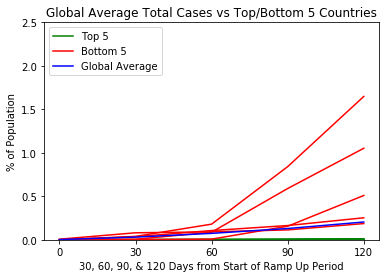

In [92]:
# Create comparison plot - Global Average Cases vs Top 5 Countries
plt.plot(x_axis,Angola,label="Top 5",color="green")
plt.plot(x_axis,Jordan,color="green")
plt.plot(x_axis,Laos,color="green")
plt.plot(x_axis,Lesotho,color="green")
plt.plot(x_axis,Rwanda,color="green")
plt.plot(x_axis,Colombia,label="Bottom 5",color="red")
plt.plot(x_axis,Costa_Rica,color="red")
plt.plot(x_axis,Iceland,color="red")
plt.plot(x_axis,Israel,color="red")
plt.plot(x_axis,Singapore,color="red")
plt.plot(x_axis,y_axis_ac,label="Global Average",color="blue")

plt.xlabel('30, 60, 90, & 120 Days from Start of Ramp Up Period')
plt.ylabel('% of Population')
plt.legend(loc=2)
plt.xticks(x_axis)
plt.ylim(0,2.5)
plt.title("Global Average Total Cases vs Top/Bottom 5 Countries")

In [93]:
# vertical_stack_deaths
x_axis=[0,30,60,90,120]
Angola = [vertical_stack_deaths.percent_pop_deaths_end[0],vertical_stack_deaths.percent_pop_deaths_30[0],vertical_stack_deaths.percent_pop_deaths_60[0],vertical_stack_deaths.percent_pop_deaths_90[0],vertical_stack_deaths.percent_pop_deaths_120[0]]
Jordan = [vertical_stack_deaths.percent_pop_deaths_end[1],vertical_stack_deaths.percent_pop_deaths_30[1],vertical_stack_deaths.percent_pop_deaths_60[1],vertical_stack_deaths.percent_pop_deaths_90[1],vertical_stack_deaths.percent_pop_deaths_120[1]]
Laos = [vertical_stack_deaths.percent_pop_deaths_end[2],vertical_stack_deaths.percent_pop_deaths_30[2],vertical_stack_deaths.percent_pop_deaths_60[2],vertical_stack_deaths.percent_pop_deaths_90[2],vertical_stack_deaths.percent_pop_deaths_120[2]]
Lesotho = [vertical_stack_deaths.percent_pop_deaths_end[3],vertical_stack_deaths.percent_pop_deaths_30[3],vertical_stack_deaths.percent_pop_deaths_60[3],vertical_stack_deaths.percent_pop_deaths_90[3],vertical_stack_deaths.percent_pop_deaths_120[3]]
Rwanda = [vertical_stack_deaths.percent_pop_deaths_end[4],vertical_stack_deaths.percent_pop_deaths_30[4],vertical_stack_deaths.percent_pop_deaths_60[4],vertical_stack_deaths.percent_pop_deaths_90[4],vertical_stack_deaths.percent_pop_deaths_120[4]]
Brazil = [vertical_stack_deaths.percent_pop_deaths_end[5],vertical_stack_deaths.percent_pop_deaths_30[5],vertical_stack_deaths.percent_pop_deaths_60[5],vertical_stack_deaths.percent_pop_deaths_90[5],vertical_stack_deaths.percent_pop_deaths_120[5]]
Colombia = [vertical_stack_deaths.percent_pop_deaths_end[6],vertical_stack_deaths.percent_pop_deaths_30[6],vertical_stack_deaths.percent_pop_deaths_60[6],vertical_stack_deaths.percent_pop_deaths_90[6],vertical_stack_deaths.percent_pop_deaths_120[6]]
Italy = [vertical_stack_deaths.percent_pop_deaths_end[7],vertical_stack_deaths.percent_pop_deaths_30[7],vertical_stack_deaths.percent_pop_deaths_60[7],vertical_stack_deaths.percent_pop_deaths_90[7],vertical_stack_deaths.percent_pop_deaths_120[7]]
Peru = [vertical_stack_deaths.percent_pop_deaths_end[8],vertical_stack_deaths.percent_pop_deaths_30[8],vertical_stack_deaths.percent_pop_deaths_60[8],vertical_stack_deaths.percent_pop_deaths_90[8],vertical_stack_deaths.percent_pop_deaths_120[8]]
El_Salvador = [vertical_stack_deaths.percent_pop_deaths_end[9],vertical_stack_deaths.percent_pop_deaths_30[9],vertical_stack_deaths.percent_pop_deaths_60[9],vertical_stack_deaths.percent_pop_deaths_90[9],vertical_stack_deaths.percent_pop_deaths_120[9]]

Text(0.5, 1.0, 'Global Average Total Deaths vs Top/Bottom 5 Countries')

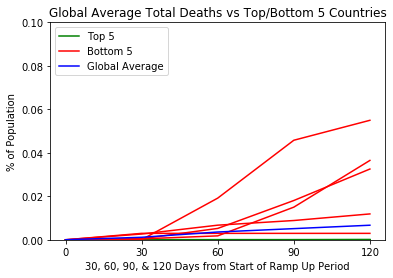

In [94]:
# Create comparison plot - Global Average Deaths vs Top 5 Countries
plt.plot(x_axis,Angola,label="Top 5",color="green")
plt.plot(x_axis,Jordan,color="green")
plt.plot(x_axis,Laos,color="green")
plt.plot(x_axis,Lesotho,color="green")
plt.plot(x_axis,Rwanda,color="green")
plt.plot(x_axis,Brazil,label="Bottom 5",color="red")
plt.plot(x_axis,Colombia,color="red")
plt.plot(x_axis,Italy,color="red")
plt.plot(x_axis,Peru,color="red")
plt.plot(x_axis,El_Salvador,color="red")
plt.plot(x_axis,y_axis_ad,label="Global Average",color="blue")

plt.xlabel('30, 60, 90, & 120 Days from Start of Ramp Up Period')
plt.ylabel('% of Population')
plt.legend(loc=2)
plt.xticks(x_axis)
plt.ylim(0,0.1)
plt.title("Global Average Total Deaths vs Top/Bottom 5 Countries")

# Determine if there is any correlation between the slope of the ramp up period and total cases/deaths over a 120 day period

In [95]:
ramp_up_ranking

,slope_ramp,rank_slope,rank_ramp,ramp_up_rank,slope_cases,rank_cases,slope_deaths,rank_deaths,overall_rank_cases,overall_rank_deaths,overall_rank
country,,,,,,,,,,,
Afghanistan,1.344762,102.0,117.0,112.0,0.019382,86.0,0.021629,86.0,116.0,116.0,110.0
Albania,1.342500,103.0,115.0,111.0,0.023535,95.0,0.029536,98.0,123.0,124.0,121.5
Algeria,2.156000,74.0,108.5,94.5,0.009646,68.0,0.027799,95.0,85.0,97.0,91.0
Angola,19.136667,2.0,8.0,2.0,0.000501,8.0,0.000989,21.0,2.0,2.0,2.0
Argentina,6.250000,15.5,36.5,23.0,0.041708,112.0,0.043367,106.0,36.0,31.0,47.5
...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.151224,156.0,154.0,159.5,0.007770,59.0,0.003534,35.0,144.0,140.0,118.5
Vietnam,1.161111,113.0,143.5,137.0,0.000093,3.0,0.000000,6.0,92.0,86.5,45.0
Yemen,0.837619,127.0,69.5,101.0,0.001634,21.0,0.022933,89.0,60.0,103.0,68.0


In [96]:
ramp_up_ranking[['slope_ramp','slope_cases','slope_deaths']].corr()

,slope_ramp,slope_cases,slope_deaths
slope_ramp,1.000000,-0.032074,0.105233
slope_cases,-0.032074,1.000000,0.383743
slope_deaths,0.105233,0.383743,1.000000


# fin